   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.8.4.1 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cudnn-cu12==9.1.0.70; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cudnn-cu12 9.3.0.75 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cufft-cu12==1

2025-05-03 04:33:26.515064: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746246806.773204      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746246806.848704      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


README.md:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

Training samples: 78839
Validation samples: 8760
Test samples: 10570


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Map:   0%|          | 0/78839 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3980: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/8760 [00:00<?, ? examples/s]

Map:   0%|          | 0/10570 [00:00<?, ? examples/s]

/tmp/ipykernel_31/1120682858.py:79: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Exact Match,F1
1,0.054600,0.014168,69.748858,81.836120
2,0.016100,0.014550,69.600457,81.941127
3,0.013600,0.014440,69.257991,81.681099
4,0.011600,0.014095,70.433790,82.277726
5,0.010100,0.014538,70.627854,82.556124
6,0.008900,0.015419,70.582192,82.720153
7,0.007800,0.015426,70.764840,82.679631
8,0.007100,0.015901,70.764840,82.797846
9,0.006400,0.016163,70.650685,82.724431
10,0.005900,0.016470,70.285388,82.515690


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked t


--- Final Test Results ---
Test Exact Match: 63.86
Test F1 Score: 77.79


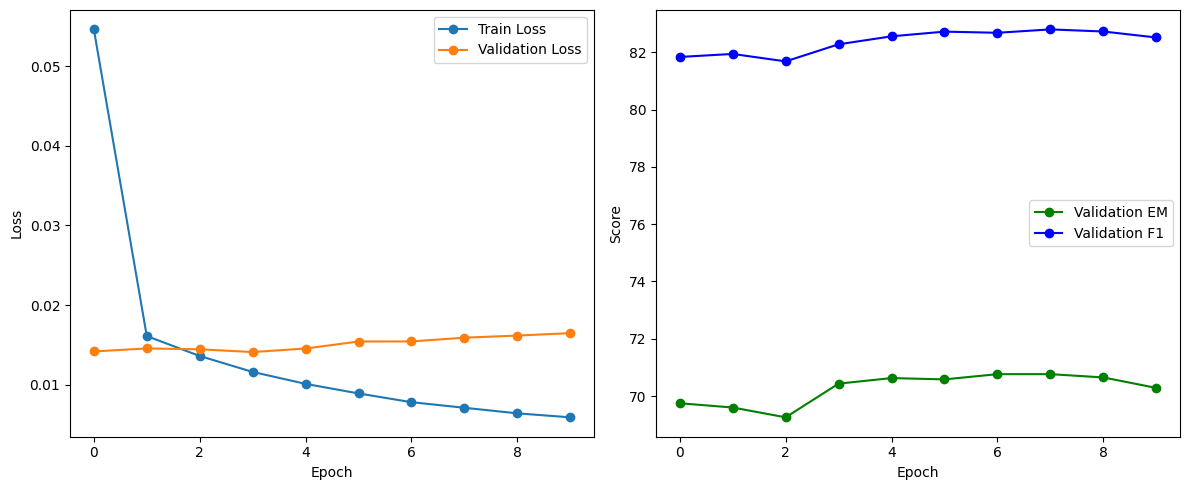

In [1]:
!pip install datasets transformers[sentencepiece] evaluate nltk matplotlib

from datasets import load_dataset, DatasetDict
from transformers import (
    T5Tokenizer,
    T5ForConditionalGeneration,
    DataCollatorForSeq2Seq,
    Seq2SeqTrainingArguments,
    Seq2SeqTrainer
)
import numpy as np
import evaluate
import random
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

squad = load_dataset("squad")

train_val_split = squad["train"].train_test_split(test_size=0.1, seed=42, shuffle=True)

squad = DatasetDict({
    "train": train_val_split["train"],
    "validation": train_val_split["test"],
    "test": squad["validation"]
})

print(f"Training samples: {len(squad['train'])}")
print(f"Validation samples: {len(squad['validation'])}")
print(f"Test samples: {len(squad['test'])}")

tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

def preprocess_function(examples):
    inputs = ["question: " + q + " context: " + c for q, c in zip(examples["question"], examples["context"])]
    targets = [random.choice(answer["text"]) for answer in examples["answers"]]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length")
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(targets, max_length=128, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_squad = squad.map(preprocess_function, batched=True, remove_columns=squad["train"].column_names)

training_args = Seq2SeqTrainingArguments(
    output_dir="./t5-squad",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    learning_rate=3e-4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=10,
    predict_with_generate=True,
    fp16=True,
    report_to="none",
    generation_max_length=128
)

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)
squad_metric = evaluate.load("squad")

def compute_metrics(eval_pred):
    preds, labels = eval_pred
    preds = np.where(
        (preds < 0) | (preds >= tokenizer.vocab_size),
        tokenizer.pad_token_id,
        preds
    )
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    formatted_predictions = [{"id": str(i), "prediction_text": pred} for i, pred in enumerate(decoded_preds)]
    formatted_references = [{"id": str(i), "answers": {"text": [label], "answer_start": [0]}} for i, label in enumerate(decoded_labels)]
    return squad_metric.compute(predictions=formatted_predictions, references=formatted_references)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_squad["train"],
    eval_dataset=tokenized_squad["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()
trainer.save_model("./t5-squad-best")

test_results = trainer.evaluate(eval_dataset=tokenized_squad["test"], metric_key_prefix="test")
print("\n--- Final Test Results ---")
print(f"Test Exact Match: {test_results['test_exact_match']:.2f}")
print(f"Test F1 Score: {test_results['test_f1']:.2f}")

log_history = trainer.state.log_history
train_loss = [log["loss"] for log in log_history if "loss" in log and "eval_loss" not in log]
eval_loss = [log["eval_loss"] for log in log_history if "eval_loss" in log]
eval_em = [log["eval_exact_match"] for log in log_history if "eval_exact_match" in log]
eval_f1 = [log["eval_f1"] for log in log_history if "eval_f1" in log]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Train Loss", marker="o")
plt.plot(eval_loss, label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(eval_em, label="Validation EM", marker="o", color="green")
plt.plot(eval_f1, label="Validation F1", marker="o", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()

plt.tight_layout()
plt.savefig("training_metrics.png", dpi=300)
plt.show()